### Z- Score

A company is looking to hire a new  database administrator.
They give a standardized test to applicants  to measure their technical knowledge.
Their first applicant, Amy, scores an 87
Based on her score, is Amy exceptionally  qualified?


In [2]:
# Given
mean = 75
x = 87
sd = 7

In [3]:
z = (x - mean)/sd

In [4]:
z

1.7142857142857142

In [5]:
from scipy import stats
zvalue = stats.norm.cdf(z)

In [6]:
zvalue


0.9567618672531671

Conclusion: Amy has score better than 95.67% of all other applicants.
It is suggested that you could hire Amy.

### Prime Numbers

In [8]:
# Data
N = 7

# Assumption => Hypothesis => Null Hypothesis
prime = True

# Subject it to test => Hypothesis Testing
# We do a test either to accept the assumption or reject
for i in range(2, N):
    if(N % i == 0):
        prime = False
        break
        
# Taking a decision (concluding) based on the test result
if(prime == True):
    print("The number is prime")
else:
    print("The number is not prime")



The number is prime


### Hypothesis Test: 1 sample T-test

In [19]:
import urllib.request as url
URL = r"https://raw.githubusercontent.com/edbullen/Hypothesis/master/ages.csv"
r = url.urlopen(URL)
data = [int(x) for x in r.read().decode().split()]
data

[32, 34, 29, 29, 22, 39, 38, 37, 38, 36, 30, 26, 22, 22]

In [20]:
import numpy as np

In [21]:
# Calculate the mean of ages
mu = np.mean(data)
mu

31.0

In [23]:
from scipy.stats import ttest_1samp

In [26]:
ttest_1samp(data, 22)

Ttest_1sampResult(statistic=5.376419101310944, pvalue=0.0001261384429324314)

In [27]:
ttest_1samp(data, 99)

Ttest_1sampResult(statistic=-40.621833209904906, pvalue=4.392449445242653e-15)

#### Hypothesis Test: Use a Two-Sample T-Test to compare two independent data-sets that are approximately normally distributed

In [28]:
URL1 = "https://raw.githubusercontent.com/edbullen/Hypothesis/master/week1.csv"
URL2 = "https://raw.githubusercontent.com/edbullen/Hypothesis/master/week2.csv"

In [29]:
import numpy as np
import urllib.request as urllib2
import matplotlib.pyplot as plt

In [30]:
r = urllib2.urlopen(URL1)
week1 = r.read().decode('utf-8')
r = urllib2.urlopen(URL2)
week2 = r.read().decode('utf-8')

In [31]:
#split the data by newline, convert list to np array float
week1 = np.asarray(week1.split()).astype(float)
week2 = np.asarray(week2.split()).astype(float)

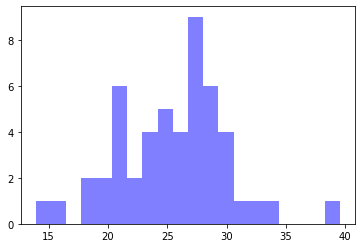

In [32]:
# plot
plt.hist(week1, bins=20, color='b', alpha=0.5)
#plt.hist(week2, bins=20, color='r', alpha=0.5)
plt.show()

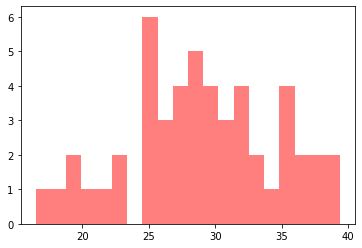

In [33]:
# plot
#plt.hist(week1, bins=20, color='b', alpha=0.5)
plt.hist(week2, bins=20, color='r', alpha=0.5)
plt.show()

In [34]:
from scipy.stats import ttest_ind  
 
week1_mean = week1.mean()
week2_mean = week2.mean()
 
print("Week 1 Sample Mean:", week1_mean)
print("Week 2 Sample Mean:", week2_mean)
 
pval = ttest_ind(week1,week2)
print(pval)

Week 1 Sample Mean: 25.4480593952
Week 2 Sample Mean: 29.0215681076
Ttest_indResult(statistic=-3.510875818698744, pvalue=0.000676767690454633)


In [35]:
if pval[1] < 0.05:
 print("pval is ", pval[1], "Null Hypothesis Rejected")
 print("samples are statistically different")
else:
 print("pval is ", pval[1], "Null Hypothesis Accepted")
 print("samples are NOT statistically different")

pval is  0.000676767690454633 Null Hypothesis Rejected
samples are statistically different


### ANOVA

“The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean.”

A one-way test identifies if at least two groups are different from each other, but doesn’t identify which groups. Used when there is one independent variable and one dependent variable.

A two-way test can be used when there are two independent variables – i.e. Store and Hour-of-Day (factors).

Anova Test Assumptions

The samples are independent.
Each sample is from a normally distributed population.
The population standard deviations of the groups are all equal. This property is known as homoscedasticity.
Consider “Kruskal-Wallis H-test” if these assumptions are not valid.

In [36]:
import numpy as np
#import seaborn as sns # Seaborn has some nice looking plots
import pandas as pd
import urllib.request as urllib2
 
# Source data from web - not really CSVs - just a list separated by new-line
URLA = "https://raw.githubusercontent.com/edbullen/Hypothesis/master/storeA.csv"
URLB = "https://raw.githubusercontent.com/edbullen/Hypothesis/master/storeB.csv"
URLC = "https://raw.githubusercontent.com/edbullen/Hypothesis/master/storeC.csv"
 
A = urllib2.urlopen(URLA).read().decode('utf-8')
B = urllib2.urlopen(URLB).read().decode('utf-8')
C = urllib2.urlopen(URLC).read().decode('utf-8')
 
#split the data by newline, convert list to np array float
A = np.asarray(A.split()).astype(float)
B = np.asarray(B.split()).astype(float)
C = np.asarray(C.split()).astype(float)
 
# Create a Pandas Data Frame with Store A,B,C as the columns
df = pd.DataFrame({'StoreA':A, 'StoreB':B, 'StoreC':C})
# Have to "melt" the data-frame for Seaborn
#sns.boxplot(x="variable", y="value", data=pd.melt(df))

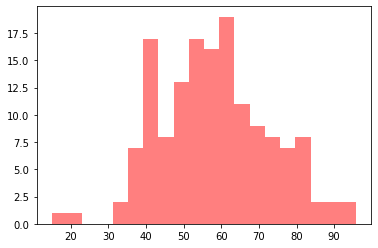

In [37]:
plt.hist(A, bins=20, color='r', alpha=0.5)
plt.show()

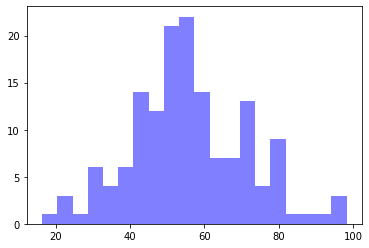

In [39]:
plt.hist(B, bins=20, color='b', alpha=0.5)
plt.show()

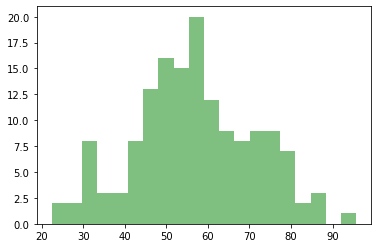

In [40]:
plt.hist(C, bins=20, color='g', alpha=0.5)
plt.show()

In [41]:
df.head()


,StoreA,StoreB,StoreC
0,73.571950,78.358550,32.232597
1,38.367363,76.019629,61.365497
2,49.363988,31.368729,60.259047
3,61.961714,45.475715,56.874925
4,38.739590,90.219779,74.783921


In [42]:
print("Store A Mean:", A.mean().round(3))
print("Store B Mean:", B.mean().round(3))
print("Store C Mean:", C.mean().round(3))

Store A Mean: 58.35
Store B Mean: 55.754
Store C Mean: 56.767


In [43]:
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
 
pval = f_oneway(A,B,C)
pval

F_onewayResult(statistic=1.138202781097911, pvalue=0.32132109475363463)

In [44]:
URLC_NEW = "https://raw.githubusercontent.com/edbullen/Hypothesis/master/storeC_NEW.csv"
C_NEW = urllib2.urlopen(URLC_NEW).read().decode('utf-8')
C_NEW = np.asarray(C_NEW.split()).astype(float)
# Create a Pandas Data Frame with Store A,B,C as the columns
df = pd.DataFrame({'StoreA':A, 'StoreB':B, 'StoreC':C_NEW})

In [45]:
df.head()

,StoreA,StoreB,StoreC
0,73.571950,78.358550,79.888225
1,38.367363,76.019629,85.463442
2,49.363988,31.368729,49.389869
3,61.961714,45.475715,76.974372
4,38.739590,90.219779,60.343773


In [46]:
pval = f_oneway(A,B,C_NEW)
pval

F_onewayResult(statistic=4.020708474960448, pvalue=0.018592989397402296)